In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Worksheet part 1

3.1 - Building and Testing Helper Function

Task 1:

In [ ]:
def logistic_function(x):
    """
    Computes the logistic function applied to any value of x.
    Arguments:
    x: scalar or numpy array of any size.
    Returns:
    y: logistic function applied to x.
    """
    # Implementation of formula: 1 / (1 + e^-x)
    y = 1 / (1 + np.exp(-x))
    return y

In [ ]:
# test case

def test_logistic_function():
  """
  Test cases for the logistic_function.
  """
  # Test with scalar input
  x_scalar = 0
  expected_output_scalar = round(1 / (1 + np.exp(0)), 3) # Expected output: 0.5
  assert round(logistic_function(x_scalar), 3) == expected_output_scalar, "Test failed for scalar input"
  # Test with positive scalar input
  x_pos = 2
  expected_output_pos = round(1 / (1 + np.exp(-2)), 3) # Expected output: ~0.881
  assert round(logistic_function(x_pos), 3) == expected_output_pos, "Test failed for positive scalar input"
  # Test with negative scalar input
  x_neg = -3
  expected_output_neg = round(1 / (1 + np.exp(3)), 3) # Expected output: ~0.047
  assert round(logistic_function(x_neg), 3) == expected_output_neg, "Test failed for negative scalar input"
  # Test with numpy array input
  x_array = np.array([0, 2, -3])
  expected_output_array = np.array([0.5, 0.881, 0.047]) # Adjusted expected values rounded to 3 decimals
  # Use np.round to round the array element-wise and compare
  assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), "Test failed for numpy array input"
  print("All tests passed!")
  # Run the test case
test_logistic_function()

All tests passed!


Task 2:

In [ ]:
def log_loss(y_true, y_pred):
    """
    Computes log loss for true target value y ={0 or 1} and predicted target value y" inbetween {0-1}.
    Arguments:
      y_true (scalar): true target value {0 or 1}.
      y_pred (scalar): predicted taget value {0-1}.
    Returns:
      loss (float): loss/error value
    """
    # Ensure y_pred is clipped to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

In [ ]:
#Test function:
y_true, y_pred = 0, 0.1
print(f"log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}")
print("+++++++++++++--------------------------++++++++++++++++++++++++")
y_true, y_pred = 1, 0.9
print(f"logloss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}")

# Test case:
def test_log_loss():
  """
  Test cases for the log_loss function.
  """
  import numpy as np
  # Test case 1: Perfect prediction (y_true = 1, y_pred = 1)
  y_true = 1
  y_pred = 1
  expected_loss = 0.0 # Log loss is 0 for perfect prediction
  assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=1, y_pred=1)"
  # Test case 2: Perfect prediction (y_true = 0, y_pred = 0)
  y_true = 0
  y_pred = 0
  expected_loss = 0.0 # Log loss is 0 for perfect prediction
  assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=0, y_pred=0)"
  # Test case 3: Incorrect prediction (y_true = 1, y_pred = 0)
  y_true = 1
  y_pred = 0
  try:
    log_loss(y_true, y_pred) # This should raise an error due to log(0)
  except ValueError:
    pass # Test passed if ValueError is raised for log(0)
  # Test case 4: Incorrect prediction (y_true = 0, y_pred = 1)
  y_true = 0
  y_pred = 1
  try:
    log_loss(y_true, y_pred) # This should raise an error due to log(0)
  except ValueError:
    pass # Test passed if ValueError is raised for log(0)
  # Test case 5: Partially correct prediction
  y_true = 1
  y_pred = 0.8
  expected_loss = -(1 * np.log(0.8)) - (0 * np.log(0.2)) # ~0.2231
  assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partially correct prediction (y_true=1, y_pred=0.8)"
  y_true = 0
  y_pred = 0.2
  expected_loss = -(0 * np.log(0.2)) - (1 * np.log(0.8)) # ~0.2231
  assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partially correct prediction (y_true=0, y_pred=0.2)"
  print("All tests passed!")
# Run the test case
test_log_loss()

log loss(0, 0.1) ==> 0.10536051565782628
+++++++++++++--------------------------++++++++++++++++++++++++
logloss(1, 0.9) ==> 0.10536051565782628
All tests passed!


Task 3:

In [ ]:
def cost_function(y_true, y_pred):
  """
  Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
  Args:
  y_true (array_like, shape(n,)): array of true values (0 or 1)
  y_pred (array_like, shape(n,)): array of predicted values (probability of y_pred being 1)
  Returns:
  cost (float): non negative cost corresponding to y_true and y_pred
  """
  assert len(y_true) == len(y_pred),"Length of true values and length of predicted values do not match"
  n = len(y_true)
  loss_vec = log_loss(y_true, y_pred)
  cost = np.sum(loss_vec) / n
  return cost

In [ ]:
# testing
def test_cost_function():
  # Test case 1: Simple example with known expected cost
  y_true = np.array([1, 0, 1])
  y_pred = np.array([0.9, 0.1, 0.8])

  # Expected output: Manually calculate cost for these values
  # log_loss(y_true, y_pred) for each example
  expected_cost = (
      -(1 * np.log(0.9)) - (1 - 1) * np.log(1 - 0.9)
      + -(0 * np.log(0.1)) - (1 - 0) * np.log(1 - 0.1)
      + -(1 * np.log(0.8)) - (1 - 1) * np.log(1 - 0.8)
  ) / 3

  # Call the cost_function to get the result
  result = cost_function(y_true, y_pred)

  # Assert that the result is close to the expected cost with a tolerance of 1e-6
  assert np.isclose(result, expected_cost, atol=1e-6), f"Test failed: {result} != {expected_cost}"
  print("Test passed for simple case!")

# Run the test case
test_cost_function()

Test passed for simple case!


Task 4:

In [ ]:
# Function to compute cost function in terms of model parameters - using vectorization
def costfunction_logreg(X, y, w, b):
  """
  Computes the cost function, given data and model parameters.
  Args:
    X (ndarray, shape(m,n)): data on features, m observations with n features.
    y (array_like, shape(m,)): array of true values of target (0 or 1).
    w (array_like, shape(n,)): weight parameters of the model.
    b (float): bias parameter of the model.
  Returns:
    cost (float): non negative cost corresponding to y and y_pred.
  """
  n, d = X.shape
  assert len(y) == n, "Number of feature observations and number of target observations do not match."
  assert len(w) == d, "Number of features and number of weight parameters do not match."

  # Compute z using np.dot
  z = np.dot(X, w) + b # Matrix-vector multiplication and adding bias

  # Compute predictions using logistic function (sigmoid)
  y_pred = logistic_function(z)

  # Compute the cost using the cost function
  cost = cost_function(y, y_pred)
  return cost

# Testing the Function:
X = np.array([[10, 20], [-10, 10]])
y = np.array([1, 0])
w = np.array([0.5, 1.5])
b = 1
print(f"cost for logistic regression(X={X}, y={y}, w={w}, b={b}) = {costfunction_logreg(X, y, w, b)}")

cost for logistic regression(X=[[ 10  20]
 [-10  10]], y=[1 0], w=[0.5 1.5], b=1) = 5.500008350834906


Task 5:

In [ ]:
def compute_gradient(X, y, w, b):
  """
  Computes gradients of the cost function with respect to model parameters.
  Args:
    X (ndarray, shape(n,d)): Input data, n observations with d features
    y (array_like, shape(n,)): True labels (0 or 1)
    w (array_like, shape(d,)): Weight parameters of the model
    b (float): Bias parameter of the model
  Returns:
    grad_w (array_like, shape(d,)): Gradients of the cost function with respect to the weight
    parameters
    grad_b (float): Gradient of the cost function with respect to the bias parameter
  """
  n, d = X.shape # X has shape (n,d)
  assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
  assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

  # Compute predictions using logistic function (sigmoid)
  z = np.dot(X, w) + b
  y_pred = logistic_function(z)

  # Compute gradients
  # Gradient for w: (1/n) * X.T * (y_pred - y)
  grad_w = np.dot(X.T, (y_pred - y)) / n

  # Gradient for b: (1/n) * sum(y_pred - y)
  grad_b = np.sum(y_pred - y) / n

  return grad_w, grad_b

In [ ]:
# Simple test case
X = np.array([[10, 20], [-10, 10]]) # shape(2,2)
y = np.array([1, 0]) # shape(2,)
w = np.array([0.5, 1.5]) # shape(2,)
b = 1 # scalar
# Assertion tests
try:
  grad_w, grad_b = compute_gradient(X, y, w, b)
  print("Gradients computed successfully.")
  print(f"grad_w: {grad_w}")
  print(f"grad_b: {grad_b}")
except AssertionError as e:
  print(f"Assertion error: {e}")

Gradients computed successfully.
grad_w: [-4.99991649  4.99991649]
grad_b: 0.4999916492890759


Task 6:

In [ ]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
  """
  Implements batch gradient descent to optimize logistic regression parameters.
  Args:
    X (ndarray, shape(n,d)): Data on features, n observations with d features
    y (array_like, shape(n,)): True values of target (0 or 1)
    w (array_like, shape(d,)): Initial weight parameters
    b (float): Initial bias parameter
    alpha (float): Learning rate
    n_iter (int): Number of iterations
    show_cost (bool): If True, displays cost every 100 iterations
    show_params (bool): If True, displays parameters every 100 iterations
  Returns:
    w (array_like, shape(d,)): Optimized weight parameters
    b (float): Optimized bias parameter
    cost_history (list): List of cost values over iterations
    params_history (list): List of parameters (w,b) over iterations
  """
  n, d = X.shape
  assert len(y) == n, "Number of observations in X and y do not match"
  assert len(w) == d, "Number of features in X and w do not match"

  cost_history = []
  params_history = []

  for i in range(n_iter):
    # Compute gradients
    grad_w, grad_b = compute_gradient(X, y, w, b)

    # Update weights and bias
    w -= alpha * grad_w
    b -= alpha * grad_b

    # Compute cost
    cost = costfunction_logreg(X, y, w, b)

    # Store cost and parameters
    cost_history.append(cost)
    params_history.append((w.copy(), b))

    # Optionally print cost and parameters
    # if show_cost and (i % 100 == 0 or i == n_iter - 1):
    #   print(f"Iteration {i}: Cost={cost:.6f}")
    # if show_params and (i % 100 == 0 or i == n_iter - 1):
    #   print(f"Iteration {i}: w={w}, b={b:.6f}")

  return w, b, cost_history, params_history

# Test the gradient_descent function with sample data
X = np.array([[0.1, 0.2], [-0.1, 0.1]]) # Shape (2,2)
y = np.array([1, 0]) # Shape (2,)
w = np.zeros(X.shape[1]) # Shape (2,) - same as number of features
b = 0.0 # Scalar
alpha = 0.1 # Learning rate
n_iter = 100000 # Number of iterations

# Perform gradient descent
w_out, b_out, cost_history, params_history = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=True,
                                                             show_params=False)

# Print final parameters and cost
print("\nFinal parameters:")
print(f"w:{w_out}, b:{b_out}")
print(f"Final cost:{cost_history[-1]:.6f}")


Final parameters:
w:[38.51304248 18.83386869], b:-2.8176836626325836
Final cost:0.008254


In [ ]:
# Simple assertion test for gradient_descent
def test_gradient_descent():
  X = np.array([[0.1, 0.2], [-0.1, 0.1]]) # Shape (2,2)
  y = np.array([1, 0]) # Shape (2,)
  w = np.zeros(X.shape[1]) # Shape (2,)
  b = 0.0 # Scalar
  alpha = 0.1 # Learning rate
  n_iter = 100 # Number of iterations

  # Run gradient descent
  w_out, b_out, cost_history, _ = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False,
                                                  show_params=False)

  # Assertions
  assert len(cost_history) == n_iter, "Cost history length does not match the number of iterations"
  assert w_out.shape == w.shape, "Shape of output weights does not match the initial weights"
  assert isinstance(b_out, float), "Bias output is not a float"
  assert cost_history[-1] < cost_history[0], "Cost did not decrease over iterations"
  print("All tests passed!")

# Run the test
test_gradient_descent()

All tests passed!


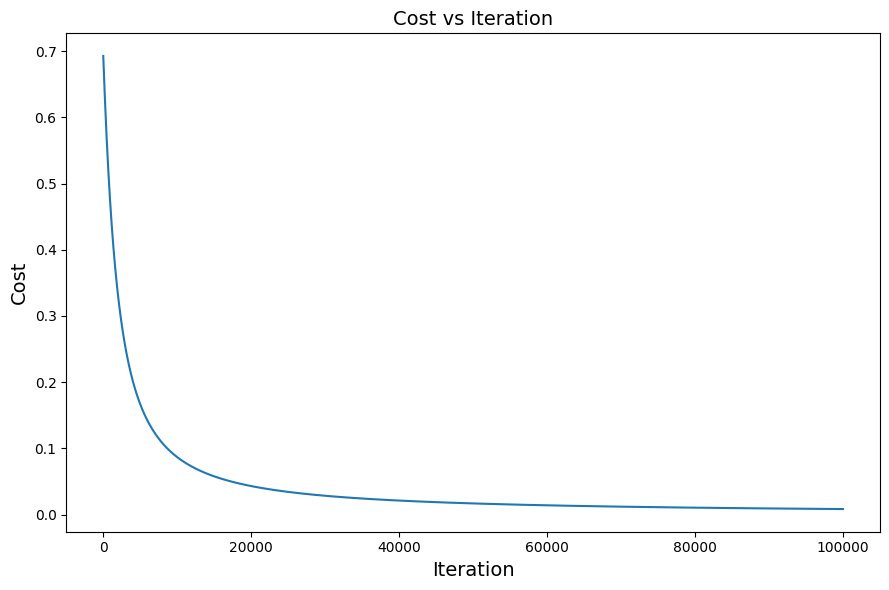

In [ ]:
# Plotting cost over iteration
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

Task 7:

In [ ]:
def prediction(X, w, b, threshold=0.5):
  """
  Predicts binary outcomes for given input features based on logistic regression parameters.
  Arguments:
    X (ndarray, shape(n,d)): Array of test independent variables (features) with n samples and d
    features.
    w (ndarray, shape(d,)): Array of weights learned via gradient descent.
    b (float): Bias learned via gradient descent.
    threshold (float, optional): Classification threshold for predicting class labels. Default is 0.5.
  Returns:
    y_pred (ndarray, shape(n,)): Array of predicted dependent variable (binary class labels: 0 or 1).
  """
  # Compute the predicted probabilities using the logistic function
  z = np.dot(X, w) + b
  y_test_prob = logistic_function(z)

  # Classify based on the threshold
  y_pred = (y_test_prob >= threshold).astype(int)
  return y_pred

In [ ]:
def test_prediction():
  X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]]) # Shape (3,2)
  w_test = np.array([1.0, -1.0]) # Shape (2,)
  b_test = 0.0 # Scalar bias
  threshold = 0.5 # Default threshold
  # Updated expected output
  expected_output = np.array([0, 1, 1])
  # Call the prediction function
  y_pred = prediction(X_test, w_test, b_test, threshold)
  # Assert that the output matches the expected output
  assert np.array_equal(y_pred, expected_output), f"Expected {expected_output}, but got {y_pred}"
  print("Test passed!")
test_prediction()

Test passed!


Task 8:

In [ ]:
def evaluate_classification(y_true, y_pred):
  """
  Computes the confusion matrix, precision, recall, and F1-score for binary classification.
  Arguments:
  y_true (ndarray, shape(n,)): Ground truth binary labels (0 or 1).
  y_pred (ndarray, shape(n,)): Predicted binary labels (0 or 1).
  Returns:
  metrics (dict): A dictionary containing confusion matrix, precision, recall, and F1-score.
  """
  # Initialize confusion matrix components
  TP = np.sum((y_true == 1) & (y_pred == 1)) # True Positives
  TN = np.sum((y_true == 0) & (y_pred == 0)) # True Negatives
  FP = np.sum((y_true == 0) & (y_pred == 1)) # False Positives
  FN = np.sum((y_true == 1) & (y_pred == 0)) # False Negatives

  # Confusion matrix
  confusion_matrix = np.array([[TN, FP],
                               [FN, TP]])

  # Precision, recall, and F1-score
  precision = TP / (TP + FP) if (TP + FP) > 0.0 else 0.0
  recall = TP / (TP + FN) if (TP + FN) > 0.0 else 0.0
  f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0.0 else 0.0

  # Metrics dictionary
  metrics = {
      "confusion_matrix": confusion_matrix,
      "precision": precision,
      "recall": recall,
      "f1_score": f1_score
  }
  return metrics

3.2 - Putting Helper Function to Action

1.  Some Basic Data Operation, Loading, Analysis and Cleaning:

In [ ]:
# Load dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data_pima_diabetes = pd.read_csv(url, names=columns)

In [ ]:
# Data Cleaning
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data_pima_diabetes[columns_to_clean] = data_pima_diabetes[columns_to_clean].replace(0, np.nan)
data_pima_diabetes.fillna(data_pima_diabetes.median(), inplace=True)
data_pima_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
data_pima_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2. Train Test Split and Standard Scaling of the Data:

In [ ]:
# Train-Test Split
X = data_pima_diabetes.drop(columns=['Outcome']).values
y = data_pima_diabetes['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standarize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. Training of the Sigmoid Regression:


Training Logistic Regression Model


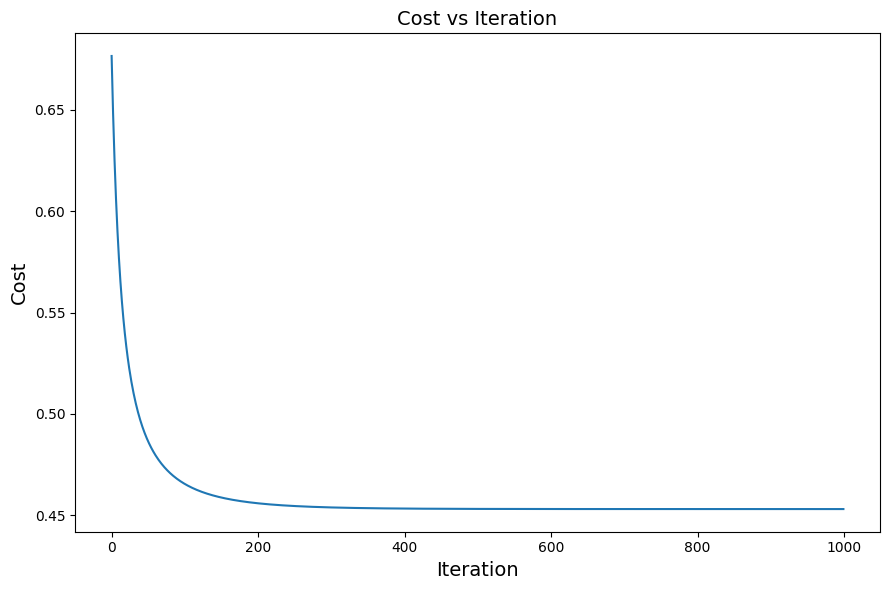

In [ ]:
# Initialize parameters
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000

# Train Model
print("\nTraining Logistic Regression Model")
w, b, cost_history, params_history = gradient_descent(
    X_train_scaled, y_train, w, b, alpha, n_iter, show_cost=True, show_params=False
)

# Plot cost history
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

4. Did the Model Overfit or Underfit?

In [ ]:
#Test model
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred = prediction(X_test_scaled, w, b)

#Evaluate train and test performance
train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test, w, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.4531
Test Loss (Cost): 0.5146


5. How well my model did?


Test Accuracy: 70.78%

Confusion Matrix:
[[82 18]
 [27 27]]
Precision: 0.60
Recall: 0.50
F1-Score: 0.55


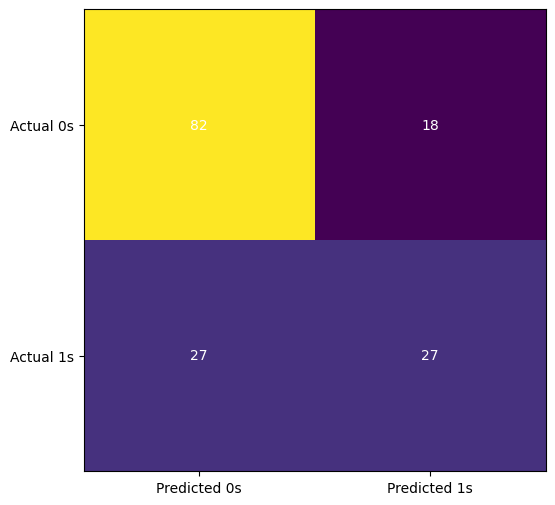

In [ ]:
#Accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

#Evaluation
metrics = evaluate_classification(y_test, y_test_pred)
confusion_matrix = metrics['confusion_matrix']
precision = metrics['precision']
recall = metrics['recall']
f1_score = metrics['f1_score']
print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

#Optional - Visualizing the Confusion matrix
#Visualizing Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j, i, confusion_matrix[i, j], ha="center", va="center", color="white")
plt.show()

Worksheet part 2

4.1 - Building and Testing Helper Function:

Task 1:

In [ ]:
import numpy as np
def softmax(z):
  """
  Computes the softmax of a 2D numpy array along the specified axis.
  Parameters:
  z (numpy.ndarray): Input array of shape (m,n) where m is the number of samples
  and n is the number of classes.
  Returns:
  numpy.ndarray: Softmax probabilities of the same shape as input (m,n), where
  each row sums to 1 and represents the probability distribution
  over classes for a sample.
  Notes:-Applies a normalization trick to prevent numerical instability by subtracting
  the max value in each row before exponentiation.
  """
  # Normalize input to prevent numerical instability
  exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
  return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [ ]:
# test case
def test_softmax():
  """
  Perform basic assertion tests on the softmax function to validate its correctness.
  Tests:-Ensure that the output probabilities sum to 1 for each row.-Ensure non-negative values (all probabilities should be >=0).
  -Test on edge cases (e.g., all zeros, very large or small values).
  """
  #Test input
  test_cases = [
      (np.array([[0, 0, 0]]), "All zeros"),
      (np.array([[1, 2, 3]]), "Simple case"),
      (np.array([[1000, 1000, 1000]]), "Large identical values"),
      (np.array([[-1000, -1000, -1000]]), "Small identical values"),
      (np.array([[1, 0, -1]]), "Mixed positive and negative")
  ]
  for i, (z, description) in enumerate(test_cases):
    print(f"Test {i+1}: {description}")
    result = softmax(z)
    # Check that probabilities sum to 1
    assert np.allclose(result.sum(axis=1), 1), f"Failed: Probabilities do not sum to 1 in {description}"
    # Check non-negativity
    assert np.all(result >= 0), f"Failed: Negative probabilities in {description}"
    print("Passed.")
  print("All tests passed for softmax function.")
test_softmax()

Test 1: All zeros
Passed.
Test 2: Simple case
Passed.
Test 3: Large identical values
Passed.
Test 4: Small identical values
Passed.
Test 5: Mixed positive and negative
Passed.
All tests passed for softmax function.


Task 2:

In [ ]:
#Loss Function for a Single Observation
def loss_softmax(y_true, y_pred):
  """
  Computes the cross-entropy loss for a single observation.
  Parameters:
  y_true (numpy.ndarray): True labels (one-hot encoded) of shape (c,).
  y_pred (numpy.ndarray): Predicted probabilities of shape (c,).
  Returns:
  float: Cross-entropy loss for the observation.
  """
  return -np.sum(y_true * np.log(y_pred + 1e-10)) # Add epsilon to prevent log(0)

In [ ]:
# test case
def test_loss_softmax():
  """
  Test the loss_softmax function using a known input and output.
  """
  # Test Case 1: Perfect prediction
  y_true = np.array([0, 1, 0]) # True label (one-hot encoded)
  y_pred = np.array([0.1, 0.8, 0.1]) # Predicted probabilities
  expected_loss = -np.log(0.8) # Expected loss for perfect prediction
  assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "TestCase 1 Failed"

  # Test Case 2: Incorrect prediction
  y_true = np.array([1, 0, 0]) # True label (one-hot encoded)
  y_pred = np.array([0.3, 0.4, 0.3]) # Predicted probabilities
  expected_loss = -np.log(0.3) # Expected loss for incorrect prediction
  assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "TestCase 2 Failed"

  # Test Case 3: Edge case with near-zero probability
  y_true = np.array([0, 1, 0]) # True label (one-hot encoded)
  y_pred = np.array([0.01, 0.98, 0.01]) # Predicted probabilities
  expected_loss = -np.log(0.98) # Expected loss for edge case
  assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "TestCase 3 Failed"

  print("All test cases passed!")

# Run the test
test_loss_softmax()

All test cases passed!


Task 3:

In [ ]:
# Cost Function for Softmax (Average Loss)
def cost_softmax(X, y, W, b):
  """
  Computes the average cross-entropy cost over all samples.
  Parameters:
  X (numpy.ndarray): Feature matrix of shape (n,d).
  y (numpy.ndarray): True labels (one-hot encoded) of shape (n,c).
  W (numpy.ndarray): Weight matrix of shape (d,c).
  b (numpy.ndarray): Bias vector of shape (c,).
  Returns:
  float: Average cross-entropy cost over all samples.
  """
  n, d = X.shape
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  return -np.sum(y * np.log(y_pred + 1e-10)) / n

In [ ]:
# testing
def test_cost_softmax():
  """
  Test the cost_softmax function using a known input and output.
  """
  # Test Case 1: Small dataset with perfect predictions
  X = np.array([[1, 2], [2, 3], [3, 4]]) # Feature matrix (n=3, d=2)
  y = np.array([[1, 0], [0, 1], [1, 0]]) # True labels (n=3, c=2, one-hot encoded)
  W = np.array([[1, -1], [-1, 1]]) # Weight matrix (d=2, c=2)
  b = np.array([0, 0]) # Bias vector (c=2)
  z = np.dot(X, W) + b
  y_pred = softmax(z) # Predicted probabilities
  expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0] # Compute expected cost
  assert np.isclose(cost_softmax(X, y, W, b), expected_cost), "TestCase 1 Failed"

  # Test Case 2: All-zero weights and bias
  X = np.array([[1, 0], [0, 1], [1, 1]]) # Feature matrix (n=3, d=2)
  y = np.array([[1, 0], [0, 1], [1, 0]]) # True labels (n=3, c=2, one-hot encoded)
  W = np.zeros((2, 2)) # Zero weight matrix
  b = np.zeros(2) # Zero bias vector
  z = np.dot(X, W) + b
  y_pred = softmax(z) # Predicted probabilities (uniform distribution)
  expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0] # Compute expected cost
  assert np.isclose(cost_softmax(X, y, W, b), expected_cost), "TestCase 2 Failed"
  print("All test cases passed!")

# Run the test
test_cost_softmax()

All test cases passed!


4.1 - Gradients for Softmax Regression:

In [ ]:
#Gradient Computation
def compute_gradient_softmax(X, y, W, b):
  """
  Computes the gradients of the cost function with respect to weights and biases.
  Parameters:
  X (numpy.ndarray): Feature matrix of shape (n,d).
  y (numpy.ndarray): True labels (one-hot encoded) of shape (n,c).
  W (numpy.ndarray): Weight matrix of shape (d,c).
  b (numpy.ndarray): Bias vector of shape (c,).
  Returns:
  tuple: Gradients with respect to weights (d,c) and biases (c,).
  """
  n, d = X.shape
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  grad_W = np.dot(X.T, (y_pred - y)) / n
  grad_b = np.sum(y_pred - y, axis=0) / n
  return grad_W, grad_b

In [ ]:
#Test function
def test_compute_gradient_softmax():
  #Define simple inputs
  X = np.array([[1, 2], [3, 4]]) # Shape (2,2)
  y = np.array([[1, 0], [0, 1]]) # Shape (2,2), one-hot encoded
  W = np.array([[0.1, 0.2], [0.3, 0.4]]) # Shape (2,2)
  b = np.array([0.01, 0.02]) # Shape (2,)

  #Expected gradients (calculated manually or using a reference implementation)
  z = np.dot(X, W) + b
  y_pred = softmax(z)
  grad_W_expected = np.dot(X.T, (y_pred - y)) / X.shape[0]
  grad_b_expected = np.sum(y_pred - y, axis=0) / X.shape[0]

  #Compute gradients using the function
  grad_W, grad_b = compute_gradient_softmax(X, y, W, b)

  #Assertions
  assert np.allclose(grad_W, grad_W_expected, atol=1e-6), "Gradient W does not match expected values"
  assert np.allclose(grad_b, grad_b_expected, atol=1e-6), "Gradient b does not match expected values"
  print("All tests passed for compute_gradient_softmax!")

#Run the test
test_compute_gradient_softmax()

All tests passed for compute_gradient_softmax!


4.2 - Gradient Descent for Softmax Regression:

In [ ]:
# Gradient Descent
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
  """
  Perform gradient descent to optimize the weights and biases.
  Parameters:
  X (numpy.ndarray): Feature matrix of shape (n,d).
  y (numpy.ndarray): True labels (one-hot encoded) of shape (n,c).
  W (numpy.ndarray): Weight matrix of shape (d,c).
  b (numpy.ndarray): Bias vector of shape (c,).
  alpha (float): Learning rate.
  n_iter (int): Number of iterations.
  show_cost (bool): Whether to display the cost at intervals.
  Returns:
  tuple: Optimized weights, biases, and cost history.
  """
  cost_history = []
  for i in range(n_iter):
    grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
    W -= alpha * grad_W
    b -= alpha * grad_b
    cost = cost_softmax(X, y, W, b)
    cost_history.append(cost)
    if show_cost and (i % 100 == 0 or i == n_iter - 1):
      print(f"Iteration {i}: Cost={cost:.6f}")
  return W, b, cost_history

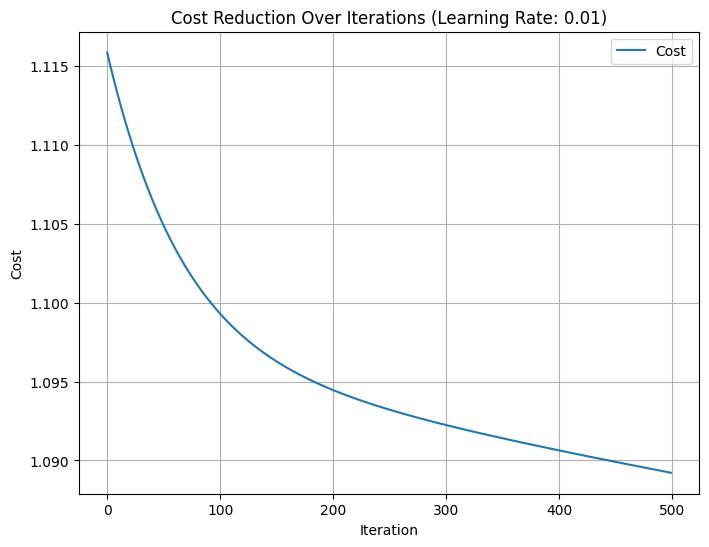

Initial Cost: 1.1158608479596404
Final Cost: 1.0892233754862581


In [61]:
# To test Gradient Descent we plot the Cost vs. Iterations and observe the behaviour and flow of the plot.
import matplotlib.pyplot as plt
def test_gradient_descent_softmax_with_plot():
  #Generate synthetic data for testing
  np.random.seed(0)
  n, d, c = 100, 5, 3 # 100 samples, 5 features, 3 classes
  X = np.random.rand(n, d)
  y_indices = np.random.randint(0, c, size=n)
  y = np.zeros((n, c))
  y[np.arange(n), y_indices] = 1 # One-hot encoding

  #Initialize weights and biases
  W = np.random.rand(d, c)
  b = np.random.rand(c)

  #Parameters for gradient descent
  alpha = 0.01 # Learning rate
  n_iter = 500 # Number of iterations

  #Run gradient descent
  W_opt, b_opt, cost_history = gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False)

  #Plot the cost history
  plt.figure(figsize=(8, 6))
  plt.plot(range(n_iter), cost_history, label="Cost")
  plt.xlabel("Iteration")
  plt.ylabel("Cost")
  plt.title(f"Cost Reduction Over Iterations (Learning Rate: {alpha})")
  plt.legend()
  plt.grid()
  plt.show()

  #Final cost should ideally be less than initial cost
  print(f"Initial Cost: {cost_history[0]}")
  print(f"Final Cost: {cost_history[-1]}")
test_gradient_descent_softmax_with_plot()

5. Decision/Prediction Function for Softmax Regression for Multi-class Classification:

In [62]:
# Prediction Function
def predict_softmax(X, W, b):
    """
    Predict the class labels for input data.
    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).
    Returns:
    numpy.ndarray: Predicted class labels of shape (n,).
    """
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return np.argmax(y_pred, axis=1)

In [63]:
# testing
def test_predict_softmax():
    # Generate synthetic data for testing
    np.random.seed(0)

    n, d, c = 10, 5, 3 # 10 samples, 5 features, 3 classes
    X = np.random.rand(n, d)
    W = np.random.rand(d, c)
    b = np.random.rand(c)

    # Compute the predictions using the function
    predictions = predict_softmax(X, W, b)

    # Check the shape of the output
    assert predictions.shape == (n,), f"Shape mismatch: expected {(n,)}, got {predictions.shape}"

    # Verify that all predicted labels are within the range of class indices
    assert np.all(predictions >= 0) and np.all(predictions < c), (f"Predictions out of range: expected 0 to {c-1}, got {predictions}")

    # Check that the predicted labels are integers
    assert np.issubdtype(predictions.dtype, np.integer), f"Predictions are not integers: {predictions.
    dtype}"
    print("All tests passed for predict_softmax!")

# Run the test
test_predict_softmax()

All tests passed for predict_softmax!


In [64]:
# Evaluation Function
def evaluate_classification(y_true, y_pred):
    """
    Evaluate the classification performance using confusion matrix, precision, recall, and F1-score.
    Parameters:
    y_true (numpy.ndarray): True class labels of shape (n,).
    y_pred (numpy.ndarray): Predicted class labels of shape (n,).
    Returns:
    tuple: Confusion matrix, precision, recall, and F1-score.
    """
    from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_true, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)
    return cm, precision, recall, f1

4.2 - Putting Helper Function to Action - Softmax Regression for the dataset:

1. Some Basic Data Operation, Loading, Analysis and Cleaning:

In [65]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")

# Display information about the dataset before cleaning
print("Dataset Info:")
X.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [66]:
print("\nDataset Description Before Cleaning:")
X.describe()


Dataset Description Before Cleaning:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


2. Constructing One Hot Encoding for Label Vector:

In [67]:
from sklearn.preprocessing import OneHotEncoder

X = iris.data # Creates a Feature Matrix
y = iris.target # Creates a Target Vector
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))
y_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

3. Train Test Split and Standard Scaling of the Data:

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42, stratify=y)

# Initialize the scaler and scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Assertions to check the shape of X_train_scaled and X_test_scaled
assert X_train_scaled.shape == (X_train.shape[0], X_train.shape[1]), f"X_train_scaled shape mismatch: {X_train_scaled.shape}"
assert X_test_scaled.shape == (X_test.shape[0], X_test.shape[1]), f"X_test_scaled shape mismatch: {X_test_scaled.shape}"

print("Shape assertions passed!")

Shape assertions passed!


4. Training of the Softmax Regression:


Training Softmax Regression Model:
Iteration 0: Cost=1.006823
Iteration 100: Cost=0.319428
Iteration 200: Cost=0.251376
Iteration 300: Cost=0.211741
Iteration 400: Cost=0.185004
Iteration 500: Cost=0.165744
Iteration 600: Cost=0.151226
Iteration 700: Cost=0.139898
Iteration 800: Cost=0.130812
Iteration 900: Cost=0.123360
Iteration 999: Cost=0.117192


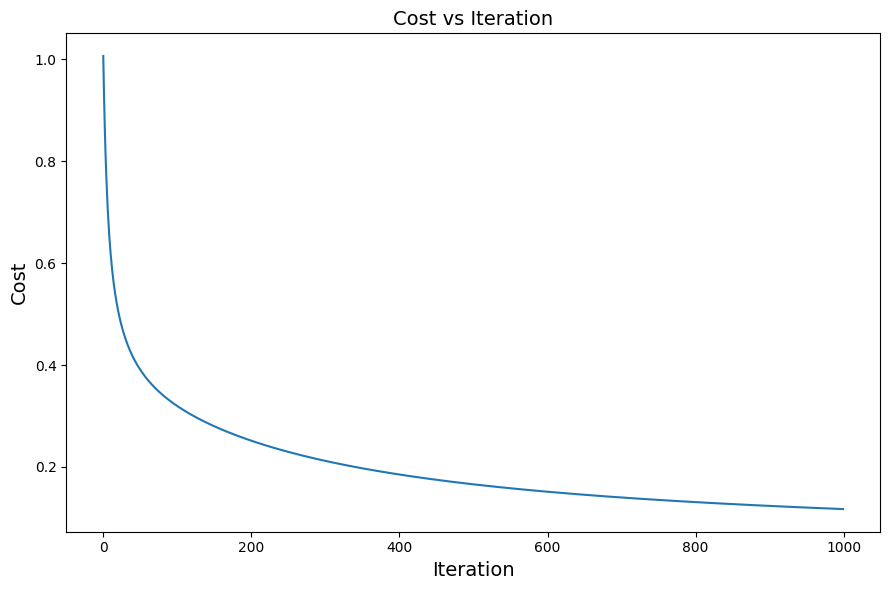

In [69]:
# Intitalizations:
num_classes = y_train.shape[1]
num_features = X_train_scaled.shape[1]
W = np.zeros((num_features, num_classes))
b = np.zeros(num_classes)
alpha = 0.1
n_iter = 1000
print("\nTraining Softmax Regression Model:")
W, b, cost_history = gradient_descent_softmax(X_train_scaled, y_train, W, b, alpha, n_iter, show_cost=True)

#Plot Cost Vs. Iterations:
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()
plt.show()

5. Did the Model Overfit or Underfit?

In [70]:
# Test model
y_train_pred = predict_softmax(X_train_scaled, W, b)
y_test_pred = predict_softmax(X_test_scaled, W, b)

# Evaluate train and test performance
train_cost = cost_softmax(X_train_scaled, y_train, W, b)
test_cost = cost_softmax(X_test_scaled, y_test, W, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.1172
Test Loss (Cost): 0.1575


6. How well my model did?


Test Accuracy: 93.33%

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Precision: 0.93
Recall: 0.93
F1-Score: 0.93


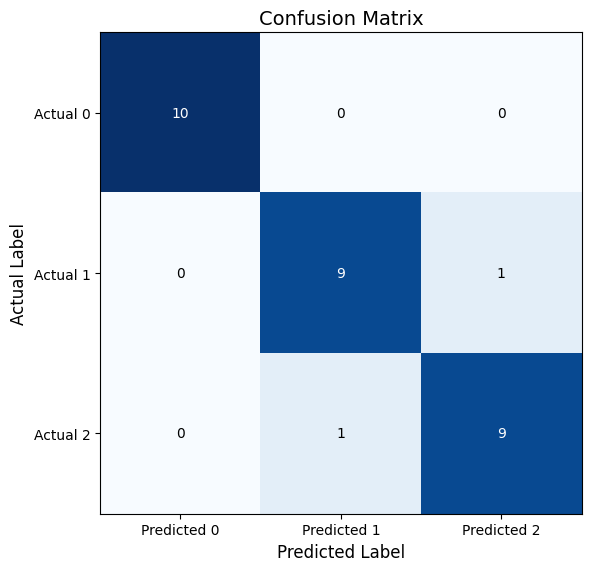

In [71]:
# Accuracy on test data
y_test_true = np.argmax(y_test, axis=1)
test_accuracy = np.mean(y_test_pred == y_test_true) * 100

print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Evaluation
y_test_true = np.argmax(y_test, axis=1)
cm, precision, recall, f1 = evaluate_classification(y_test_true, y_test_pred)
print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

#Optional - Visualizing the COnfusion matrix
# Visualizing Confusion Matrix
# Visualization
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm, cmap='Blues') # Use a color map for better visualization
# Set tick labels for the axes
ax.set_xticks(range(3))
ax.set_yticks(range(3))
ax.set_xticklabels(['Predicted 0', 'Predicted 1', 'Predicted 2'])
ax.set_yticklabels(['Actual 0', 'Actual 1', 'Actual 2'])
# Add labels to each cell in the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > np.max(cm) / 2 else 'black')

# Add grid lines and axis labels
ax.grid(False)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tight_layout()
plt.show()